In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

import pickle as pkl
import math
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd
from google.colab import drive
from keras.callbacks import LearningRateScheduler, TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras import layers, regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, Callback, EarlyStopping, LambdaCallback
from keras.initializers import glorot_normal, RandomNormal, Zeros
from keras.models import Model, load_model, Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.layers import Activation
from keras.layers import Flatten, Add, Average
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import concatenate
from keras.layers import GaussianNoise
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
all_data = pd.read_csv("/content/drive/MyDrive/550FinalProject/EN_data.csv")
all_data["Add"] = all_data["Title"] +all_data["Description"]
all_data

,Unnamed: 0,Class Index,Title,Description,Add
0,0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
...,...,...,...,...,...
127595,7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,Around the worldUkrainian presidential candida...
127596,7596,2,Void is filled with Clement,With the supply of attractive pitching options...,Void is filled with ClementWith the supply of ...
127597,7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,Martinez leaves bitterLike Roger Clemens did a...
127598,7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,5 of arthritis patients in Singapore take Bext...


## Test Data = 5%

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
X=all_data['Add'].values
y=all_data['Class Index'].values
X_train05, X_test05, y_train05, y_test05  = train_test_split(X, y, test_size=0.05, random_state=42)
train_data05 = {'Label': y_train05,
        'Des': X_train05}
train_data05 = pd.DataFrame(train_data05)
test_data05 = {'Label': y_test05,
        'Des': X_test05}
test_data05 = pd.DataFrame(test_data05)
test_data05

,Label,Des
0,2,"No. 3 Georgia Tech 79, Arkansas-Little Rock 54..."
1,2,Carter #39;s #39;got nothing to say #39; afte...
2,4,Adobe offers standard for raw photo formatsThe...
3,1,Antibiotic hope for Parkinson's\An antibiotic ...
4,3,"Exit Blog, Enter LeggA high-profile departure ..."
...,...,...
6375,2,Indians clean up with sweepThe Indians #39; bu...
6376,2,Bulloch is new Scotland skipperGORDON BULLOCH ...
6377,3,Zurich Financial gains on nursing home settlem...
6378,4,Sony net profit more than doubles; Spider-Man ...


## Test Data = 10%

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
X=all_data['Add'].values
y=all_data['Class Index'].values
X_train10, X_test10, y_train10, y_test10  = train_test_split(X, y, test_size=0.1, random_state=42)
train_data10 = {'Label': y_train10,
        'Des': X_train10}
train_data10 = pd.DataFrame(train_data10)
test_data10 = {'Label': y_test10,
        'Des': X_test10}
test_data10 = pd.DataFrame(test_data10)
test_data10

,Label,Des
0,2,"No. 3 Georgia Tech 79, Arkansas-Little Rock 54..."
1,2,Carter #39;s #39;got nothing to say #39; afte...
2,4,Adobe offers standard for raw photo formatsThe...
3,1,Antibiotic hope for Parkinson's\An antibiotic ...
4,3,"Exit Blog, Enter LeggA high-profile departure ..."
...,...,...
12755,2,knows what it takesWhen Michigan quarterback M...
12756,4,1 Nation briefingWASHINGTON -- Texas researche...
12757,1,"Athletics Edge Orioles 4-3OAKLAND, Calif. - Je..."
12758,3,Nikkei Falls on Higher Oil PriceThe Nikkei ave...


## Test Data = 20%

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X=all_data['Add'].values
y=all_data['Class Index'].values
X_train20, X_test20, y_train20, y_test20  = train_test_split(X, y, test_size=0.2, random_state=42)
train_data20 = {'Label': y_train20,
        'Des': X_train20}
train_data20 = pd.DataFrame(train_data20)
test_data20 = {'Label': y_test20,
        'Des': X_test20}
test_data20 = pd.DataFrame(test_data20)
test_data20

,Label,Des
0,2,"No. 3 Georgia Tech 79, Arkansas-Little Rock 54..."
1,2,Carter #39;s #39;got nothing to say #39; afte...
2,4,Adobe offers standard for raw photo formatsThe...
3,1,Antibiotic hope for Parkinson's\An antibiotic ...
4,3,"Exit Blog, Enter LeggA high-profile departure ..."
...,...,...
25515,1,Communist duo seek closer tiesChinese Presiden...
25516,4,Last of Mercury Astronauts Remember #39;Gordo...
25517,3,Tokyo Stocks Seen Firming After Nasdaq TOKYO (...
25518,3,HCA Blames Hurricanes for Lower Earnings NEW Y...


## Test Data = 50%

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X=all_data['Add'].values
y=all_data['Class Index'].values
X_train50, X_test50, y_train50, y_test50  = train_test_split(X, y, test_size=0.5, random_state=42)
train_data50 = {'Label': y_train50,
        'Des': X_train50}
train_data50 = pd.DataFrame(train_data50)
test_data50 = {'Label': y_test50,
        'Des': X_test50}
test_data50 = pd.DataFrame(test_data50)
test_data50

,Label,Des
0,2,"No. 3 Georgia Tech 79, Arkansas-Little Rock 54..."
1,2,Carter #39;s #39;got nothing to say #39; afte...
2,4,Adobe offers standard for raw photo formatsThe...
3,1,Antibiotic hope for Parkinson's\An antibiotic ...
4,3,"Exit Blog, Enter LeggA high-profile departure ..."
...,...,...
63795,4,Intel Bumps Speed Of Fastest Centrinocom. Inte...
63796,2,"Ramirez, Red Sox Batter White SoxManny Ramirez..."
63797,4,Another Phishing Hole Found in GoogleGoogle In...
63798,1,Liberals enter political minefield of minority...


In [7]:
%%bash
pip install -q transformers

In [8]:
import sys
sys.version

'3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]'

In [9]:
!pip3 install fastai

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path 

import os

import torch
import torch.optim as optim

import random 

# fastai
from fastai import *
from fastai.text import *
from fastai.callbacks import *

# transformers
from transformers import PreTrainedModel, PreTrainedTokenizer, PretrainedConfig

from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig
from transformers import XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig
from transformers import XLMForSequenceClassification, XLMTokenizer, XLMConfig
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig

In [11]:
import fastai
import transformers
print('fastai version :', fastai.__version__)
print('transformers version :', transformers.__version__)

fastai version : 1.0.61
transformers version : 4.14.1


In [12]:
MODEL_CLASSES = {
    'bert': (BertForSequenceClassification, BertTokenizer, BertConfig),
    'roberta': (RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig)
}

In [13]:
# Parameters
seed = 42
use_fp16 = False
bs = 16

# model_type = 'roberta'
# pretrained_model_name = 'roberta-base'

model_type = 'bert'
pretrained_model_name='bert-base-uncased'

In [ ]:
model_class, tokenizer_class, config_class = MODEL_CLASSES['bert']
#model_class, tokenizer_class, config_class = MODEL_CLASSES['roberta']
model_class

transformers.models.bert.modeling_bert.BertForSequenceClassification

In [14]:
def seed_all(seed_value):
    random.seed(seed_value) # Python
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

In [15]:
seed_all(seed)

In [16]:
class TransformersBaseTokenizer(BaseTokenizer):
    """Wrapper around PreTrainedTokenizer to be compatible with fast.ai"""
    def __init__(self, pretrained_tokenizer: PreTrainedTokenizer, model_type = 'bert', **kwargs):
        self._pretrained_tokenizer = pretrained_tokenizer
        self.max_seq_len = pretrained_tokenizer.model_max_length
        self.model_type = model_type

    def __call__(self, *args, **kwargs): 
        return self

    def tokenizer(self, t:str) -> List[str]:
        """Limits the maximum sequence length and add the spesial tokens"""
        CLS = self._pretrained_tokenizer.cls_token
        SEP = self._pretrained_tokenizer.sep_token
        if self.model_type in ['roberta']:
            tokens = self._pretrained_tokenizer.tokenize(t, add_prefix_space=True)[:self.max_seq_len - 2]
            tokens = [CLS] + tokens + [SEP]
        else:
            tokens = self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2]
            if self.model_type in ['xlnet']:
                tokens = tokens + [SEP] +  [CLS]
            else:
                tokens = [CLS] + tokens + [SEP]
        return tokens

In [ ]:
transformer_tokenizer = tokenizer_class.from_pretrained(pretrained_model_name)
transformer_base_tokenizer = TransformersBaseTokenizer(pretrained_tokenizer = transformer_tokenizer, model_type = model_type)
fastai_tokenizer = Tokenizer(tok_func = transformer_base_tokenizer, pre_rules=[], post_rules=[])

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
transformer_tokenizer.model_max_length

512

In [ ]:
class TransformersVocab(Vocab):
    def __init__(self, tokenizer: PreTrainedTokenizer):
        super(TransformersVocab, self).__init__(itos = [])
        self.tokenizer = tokenizer
    
    def numericalize(self, t:Collection[str]) -> List[int]:
        "Convert a list of tokens `t` to their ids."
        return self.tokenizer.convert_tokens_to_ids(t)
        #return self.tokenizer.encode(t)

    def textify(self, nums:Collection[int], sep=' ') -> List[str]:
        "Convert a list of `nums` to their tokens."
        nums = np.array(nums).tolist()
        return sep.join(self.tokenizer.convert_ids_to_tokens(nums)) if sep is not None else self.tokenizer.convert_ids_to_tokens(nums)
    
    def __getstate__(self):
        return {'itos':self.itos, 'tokenizer':self.tokenizer}

    def __setstate__(self, state:dict):
        self.itos = state['itos']
        self.tokenizer = state['tokenizer']
        self.stoi = collections.defaultdict(int,{v:k for k,v in enumerate(self.itos)})

In [ ]:
transformer_vocab =  TransformersVocab(tokenizer = transformer_tokenizer)
numericalize_processor = NumericalizeProcessor(vocab=transformer_vocab)

tokenize_processor = TokenizeProcessor(tokenizer=fastai_tokenizer, include_bos=False, include_eos=False)

transformer_processor = [tokenize_processor, numericalize_processor]

In [ ]:
pad_first = bool(model_type in ['bert'])
#pad_first = bool(model_type in ['roberta'])
pad_idx = transformer_tokenizer.pad_token_id

In [ ]:
tokens = transformer_tokenizer.tokenize('Salut c est moi, Hello it s me')
print(tokens)
ids = transformer_tokenizer.convert_tokens_to_ids(tokens)
print(ids)
transformer_tokenizer.convert_ids_to_tokens(ids)

['sal', '##ut', 'c', 'est', 'moi', ',', 'hello', 'it', 's', 'me']
[16183, 4904, 1039, 9765, 25175, 1010, 7592, 2009, 1055, 2033]


['sal', '##ut', 'c', 'est', 'moi', ',', 'hello', 'it', 's', 'me']

In [ ]:
databunch = (TextList.from_df(train_data10, cols='Des', processor=transformer_processor)
             .split_by_rand_pct(0.1,seed=seed)
             .label_from_df(cols= 'Label')
             .add_test(test_data10)
             .databunch(bs=bs, pad_first=pad_first, pad_idx=pad_idx))

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
print('[CLS] token :', transformer_tokenizer.cls_token)
print('[SEP] token :', transformer_tokenizer.sep_token)
print('[PAD] token :', transformer_tokenizer.pad_token)
databunch.show_batch()

[CLS] token : [CLS]
[SEP] token : [SEP]
[PAD] token : [PAD]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


text,target
"[CLS] bio ##tech ' s 5 bag ##gers ##how can yesterday ' s bio ##tech winners lead you to today ' s top performers ? "" / & gt ; & lt ; meta name = "" key ##words "" content = "" char ##ly travers rule breakers bio ##tech el ##n el ##an im ##cl ##one im ##cl sep ##rac ##or sep ##r "" / & gt ; &",3
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD],4
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD],3
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD],3
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD],3


In [ ]:
print('[CLS] id :', transformer_tokenizer.cls_token_id)
print('[SEP] id :', transformer_tokenizer.sep_token_id)
print('[PAD] id :', pad_idx)
test_one_batch = databunch.one_batch()[0]
print('Batch shape : ',test_one_batch.shape)
print(test_one_batch)

[CLS] id : 101
[SEP] id : 102
[PAD] id : 0
Batch shape :  torch.Size([16, 379])
tensor([[  101, 16012, 15007,  ...,  9262, 22483,   102],
        [    0,     0,     0,  ...,  6928,  1012,   102],
        [    0,     0,     0,  ..., 13675,  4710,   102],
        ...,
        [    0,     0,     0,  ..., 14181,  1025,   102],
        [    0,     0,     0,  ..., 10528,  1012,   102],
        [    0,     0,     0,  ...,  5366,  1012,   102]])


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
# defining our model architecture 
class CustomTransformerModel(nn.Module):
    def __init__(self, transformer_model: PreTrainedModel):
        super(CustomTransformerModel,self).__init__()
        self.transformer = transformer_model
        
    def forward(self, input_ids, attention_mask=None):
        
        # attention_mask
        # Mask to avoid performing attention on padding token indices.
        # Mask values selected in ``[0, 1]``:
        # ``1`` for tokens that are NOT MASKED, ``0`` for MASKED tokens.
        attention_mask = (input_ids!=pad_idx).type(input_ids.type()) 
        
        logits = self.transformer(input_ids,
                                  attention_mask = attention_mask)[0]   
        return logits

In [ ]:
config = config_class.from_pretrained(pretrained_model_name)
config.num_labels = 4
config.use_bfloat16 = use_fp16
print(config)

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.14.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [ ]:
transformer_model = model_class.from_pretrained(pretrained_model_name, config = config)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
custom_transformer_model = CustomTransformerModel(transformer_model = transformer_model)

In [ ]:
from fastai.callbacks import *
from transformers import AdamW
from functools import partial

CustomAdamW = partial(AdamW, correct_bias=False)

learner = Learner(databunch, 
                  custom_transformer_model, 
                  opt_func = CustomAdamW, 
                  metrics=[accuracy, error_rate])

# Show graph of learner stats and metrics after each epoch.
learner.callbacks.append(ShowGraph(learner))

# Put learn in FP16 precision mode. --> Seems to not working
if use_fp16: learner = learner.to_fp16()

In [ ]:
print(learner.model)

CustomTransformerModel(
  (transformer): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_feature

In [ ]:

# For roberta-base
# list_layers = [learner.model.transformer.roberta.embeddings,
#               learner.model.transformer.roberta.encoder.layer[0],
#               learner.model.transformer.roberta.encoder.layer[1],
#               learner.model.transformer.roberta.encoder.layer[2],
#               learner.model.transformer.roberta.encoder.layer[3],
#               learner.model.transformer.roberta.encoder.layer[4],
#               learner.model.transformer.roberta.encoder.layer[5],
#               learner.model.transformer.roberta.encoder.layer[6],
#               learner.model.transformer.roberta.encoder.layer[7],
#               learner.model.transformer.roberta.encoder.layer[8],
#               learner.model.transformer.roberta.encoder.layer[9],
#               learner.model.transformer.roberta.encoder.layer[10],
#               learner.model.transformer.roberta.encoder.layer[11]]

# For bert-base
list_layers = [learner.model.transformer.bert.embeddings,
              learner.model.transformer.bert.encoder.layer[0],
              learner.model.transformer.bert.encoder.layer[1],
              learner.model.transformer.bert.encoder.layer[2],
              learner.model.transformer.bert.encoder.layer[3],
              learner.model.transformer.bert.encoder.layer[4],
              learner.model.transformer.bert.encoder.layer[5],
              learner.model.transformer.bert.encoder.layer[6],
              learner.model.transformer.bert.encoder.layer[7],
              learner.model.transformer.bert.encoder.layer[8],
              learner.model.transformer.bert.encoder.layer[9],
              learner.model.transformer.bert.encoder.layer[10],
              learner.model.transformer.bert.encoder.layer[11],
              learner.model.transformer.bert.pooler]

In [ ]:
list_layers

[BertEmbeddings(
   (word_embeddings): Embedding(30522, 768, padding_idx=0)
   (position_embeddings): Embedding(512, 768)
   (token_type_embeddings): Embedding(2, 768)
   (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
   (dropout): Dropout(p=0.1, inplace=False)
 ), BertLayer(
   (attention): BertAttention(
     (self): BertSelfAttention(
       (query): Linear(in_features=768, out_features=768, bias=True)
       (key): Linear(in_features=768, out_features=768, bias=True)
       (value): Linear(in_features=768, out_features=768, bias=True)
       (dropout): Dropout(p=0.1, inplace=False)
     )
     (output): BertSelfOutput(
       (dense): Linear(in_features=768, out_features=768, bias=True)
       (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
       (dropout): Dropout(p=0.1, inplace=False)
     )
   )
   (intermediate): BertIntermediate(
     (dense): Linear(in_features=768, out_features=3072, bias=True)
   )
   (output): BertOutput(
     (dense

In [ ]:
learner.split(list_layers)
num_groups = len(learner.layer_groups)
print('Learner split in',num_groups,'groups')
print(learner.layer_groups)

Learner split in 14 groups
[Sequential(
  (0): Embedding(30522, 768, padding_idx=0)
  (1): Embedding(512, 768)
  (2): Embedding(2, 768)
  (3): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (4): Dropout(p=0.1, inplace=False)
), Sequential(
  (0): Linear(in_features=768, out_features=768, bias=True)
  (1): Linear(in_features=768, out_features=768, bias=True)
  (2): Linear(in_features=768, out_features=768, bias=True)
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=768, out_features=768, bias=True)
  (5): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (6): Dropout(p=0.1, inplace=False)
  (7): Linear(in_features=768, out_features=3072, bias=True)
  (8): Linear(in_features=3072, out_features=768, bias=True)
  (9): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (10): Dropout(p=0.1, inplace=False)
), Sequential(
  (0): Linear(in_features=768, out_features=768, bias=True)
  (1): Linear(in_features=768, out_features=768, bias=True)
  (2): Linear(in_fea

In [ ]:
learner.save('untrain')
seed_all(seed)
learner.load('untrain')

Learner(data=TextClasDataBunch;

Train: LabelList (103356 items)
x: TextList
[CLS] hungry bayern now second ##bay ##ern munich moved to within one point of the summit of the german league bundesliga with a 2 - 0 win over leaders wolf ##sburg . claudio pi ##zar ##ro opened his account for the season with a brace on 24 and 45 minutes [SEP],[CLS] 450 colombian para ##mi ##lita ##ries di ##sar ##ms ##ome 450 right - wing paramilitary fighters left colombia ' s crowded battlefield ##s , turning in their weapons and asking society to let them back into its fold . [SEP],[CLS] belt ##re , dodgers belt mets ##ad ##rian belt ##re went 5 for 5 with his major league - leading 42 ##d home run , and the los angeles dodgers got a pair of big pinch hits yesterday in a 4 - 2 victory over the mets in new york . [SEP],[CLS] palestinians wants us to ensure smooth polls : palestinian leaders on sunday outlined plans to persuade visiting american envoy ##s to pressure israel into removing troops from urban 

In [ ]:
learner.summary()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


CustomTransformerModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [379, 768]           23,440,896 True      
______________________________________________________________________
Embedding            [379, 768]           393,216    True      
______________________________________________________________________
Embedding            [379, 768]           1,536      True      
______________________________________________________________________
LayerNorm            [379, 768]           1,536      True      
______________________________________________________________________
Dropout              [379, 768]           0          False     
______________________________________________________________________
Linear               [379, 768]           590,592    True      
______________________________________________________________________
Linear               [379, 768]           590,592    True      
_______________________________________

In [ ]:
#learner.lr_find()

Min numerical gradient: 5.25E-05
Min loss divided by 10: 7.59E-06


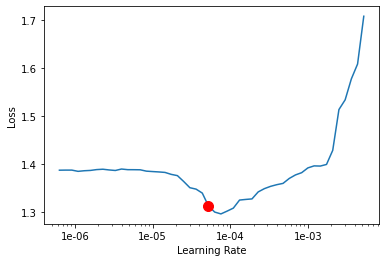

In [ ]:
#learner.recorder.plot(skip_end=10,suggestion=True)

In [ ]:
learner.unfreeze()

In [ ]:
num_groups = len(learner.layer_groups)
num_groups

13

In [ ]:
import torch
torch.cuda.empty_cache()

## Acc for Test = 5%

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.176298,0.190573,0.936232,0.063768,15:07
1,0.137993,0.158404,0.946543,0.053457,14:58


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


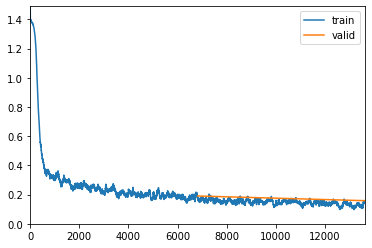

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
lr = 1e-5
learner.fit_one_cycle(2, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))


## Acc for Test = 10%

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.163735,0.176313,0.938523,0.061477,13:31
1,0.145367,0.154051,0.946621,0.053379,14:40


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


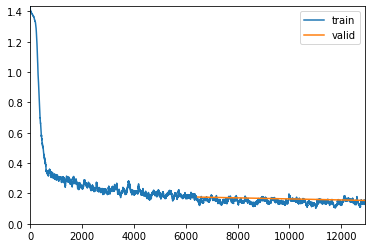

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
lr = 1e-5
learner.fit_one_cycle(2, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))

## Acc for Test = 20%

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.215876,0.194946,0.927998,0.072002,11:44
1,0.143730,0.170500,0.940733,0.059267,11:42


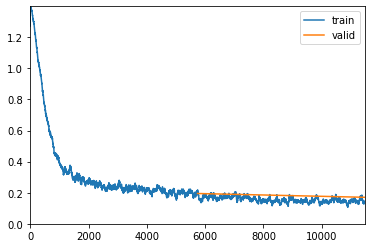

In [ ]:
lr = 1e-5
learner.fit_one_cycle(2, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))

## Acc for Test = 50%

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.203604,0.202711,0.933229,0.066771,07:47
1,0.169357,0.185427,0.939498,0.060502,07:31


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


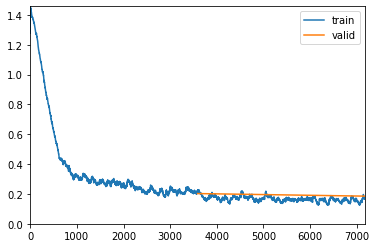

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
lr = 1e-5
learner.fit_one_cycle(2, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))